In [137]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
from pandas.plotting import _converter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tips = pd.read_csv('datasets/sna/tips.txt', header = None,delimiter="\t")
tips.columns = ['user_id', 'venue_id','tip']
checkins = pd.read_csv('datasets/sna/checkins.txt', header = None,delimiter="\t")
checkins.columns = ['user_id', 'venue_id']
checkins['rating'] = pd.Series(0)
tags = pd.read_csv('datasets/sna/tags.txt', header = None,delimiter="\t",encoding='ISO-8859-1')
tags.columns = ['venue_id', 'tags']
tips

,user_id,venue_id,tip
0,24436,15,make your own sandwich: tuna salad on country ...
1,8550,20,The calamari as an appetizer and the quail. Pr...
2,1537,20,Be careful with the napkins on your pants. The...
3,59283,20,"try the steak frites, it's the best - believe me"
4,713,20,go visit google across the street. see the big...
5,40518,20,Great drinks & good appetizers. Love the desse...
6,33560,20,Try the English breakfast
7,17435,20,total madhouse and that's because the french o...
8,59010,20,And by the way if u are looking for a Job on a...
9,59010,20,Go for the grattin dauphinois!


In [138]:
def weighted_score(x):
    para = x['tip']
    sentense = word_tokenize(para)
    word_features = []

    for i,j in nltk.pos_tag(sentense):
        if j in ['JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS']:
            word_features.append(i)

    rating = 0

    for i in word_features:
        #print(i)
        with open('datasets/sna/pwords.txt', 'rt') as f:
            for row in f.readlines():
                reader = row.split('\t')
                if i==reader[0]:
                    #print(i, reader[1])
                    rating = rating + int(reader[1])
    if rating > 5 : 
        rating = 5
    elif rating < -5 :
        rating = -5
    return rating

In [139]:
tips1 = tips.head(3000)
tips1

,user_id,venue_id,tip
0,24436,15,make your own sandwich: tuna salad on country ...
1,8550,20,The calamari as an appetizer and the quail. Pr...
2,1537,20,Be careful with the napkins on your pants. The...
3,59283,20,"try the steak frites, it's the best - believe me"
4,713,20,go visit google across the street. see the big...
5,40518,20,Great drinks & good appetizers. Love the desse...
6,33560,20,Try the English breakfast
7,17435,20,total madhouse and that's because the french o...
8,59010,20,And by the way if u are looking for a Job on a...
9,59010,20,Go for the grattin dauphinois!


In [140]:
tips1['score'] = tips1.apply(weighted_score,axis=1)
tips1

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,user_id,venue_id,tip,score
0,24436,15,make your own sandwich: tuna salad on country ...,0
1,8550,20,The calamari as an appetizer and the quail. Pr...,5
2,1537,20,Be careful with the napkins on your pants. The...,2
3,59283,20,"try the steak frites, it's the best - believe me",3
4,713,20,go visit google across the street. see the big...,1
5,40518,20,Great drinks & good appetizers. Love the desse...,3
6,33560,20,Try the English breakfast,0
7,17435,20,total madhouse and that's because the french o...,0
8,59010,20,And by the way if u are looking for a Job on a...,0
9,59010,20,Go for the grattin dauphinois!,0


In [141]:
tips3 = tips1[['venue_id','score']].groupby('score').count()
tips3.columns = ['number of users']
tips3

,number of users
score,
-5,1
-4,1
-3,21
-2,43
-1,20
0,1790
1,91
2,134
3,507


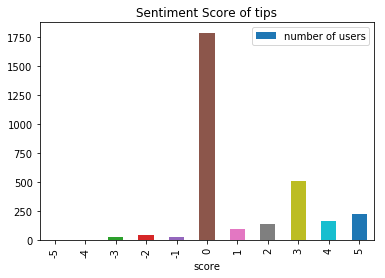

In [142]:
tips3.plot(y='number of users',kind='bar',title='Sentiment Score of tips',legend='True')

In [143]:
tags.head(5)

,venue_id,tags
0,15,NaN
1,20,"andy cohen,bakery,bar,barbeque,bbq,bistro,bout..."
2,25,"colombian,cupcake,fish tacos,grilled corn,long..."
3,26,"brunch,happy hour,irish,pub"
4,36,"french,soho,zagat-rated,zagats"


In [144]:

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')
tfidf

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [145]:
tags['tags'] = tags['tags'].fillna('')
tags.head(5)

,venue_id,tags
0,15,
1,20,"andy cohen,bakery,bar,barbeque,bbq,bistro,bout..."
2,25,"colombian,cupcake,fish tacos,grilled corn,long..."
3,26,"brunch,happy hour,irish,pub"
4,36,"french,soho,zagat-rated,zagats"


In [146]:
tfidf_matrix = tfidf.fit_transform(tags['tags'].values.astype('U'))
tfidf_matrix

<3298x3220 sparse matrix of type '<type 'numpy.float64'>'
	with 18172 stored elements in Compressed Sparse Row format>

In [147]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [148]:
indices = pd.Series(tags.index, index=tags['venue_id'])

In [149]:
def get_recommendations(venue, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[venue]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    venue_indices = [i[0] for i in sim_scores]

    # Return the top 1-0 most similar movies
    return tags['venue_id'].iloc[venue_indices]

In [150]:
get_recommendations(20)

3049    170936
2738     81766
990      11173
2697     76405
314       1143
1421     15590
1669     20001
534       4733
8           46
1367     15024
Name: venue_id, dtype: int64